In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = r'C:\Users\Manil\Downloads\house-prices-advanced-regression-techniques\train.csv'
df = pd.read_csv(train_path)

In [3]:
#Display the first and last 5 rows.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
#Display the data types of each column.

df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
#Check for missing values and calculate the percentage of missing data for each column.
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

In [7]:
missing_data

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [8]:
#Summarize the statistical properties of the numerical columns using describe().
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [10]:
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

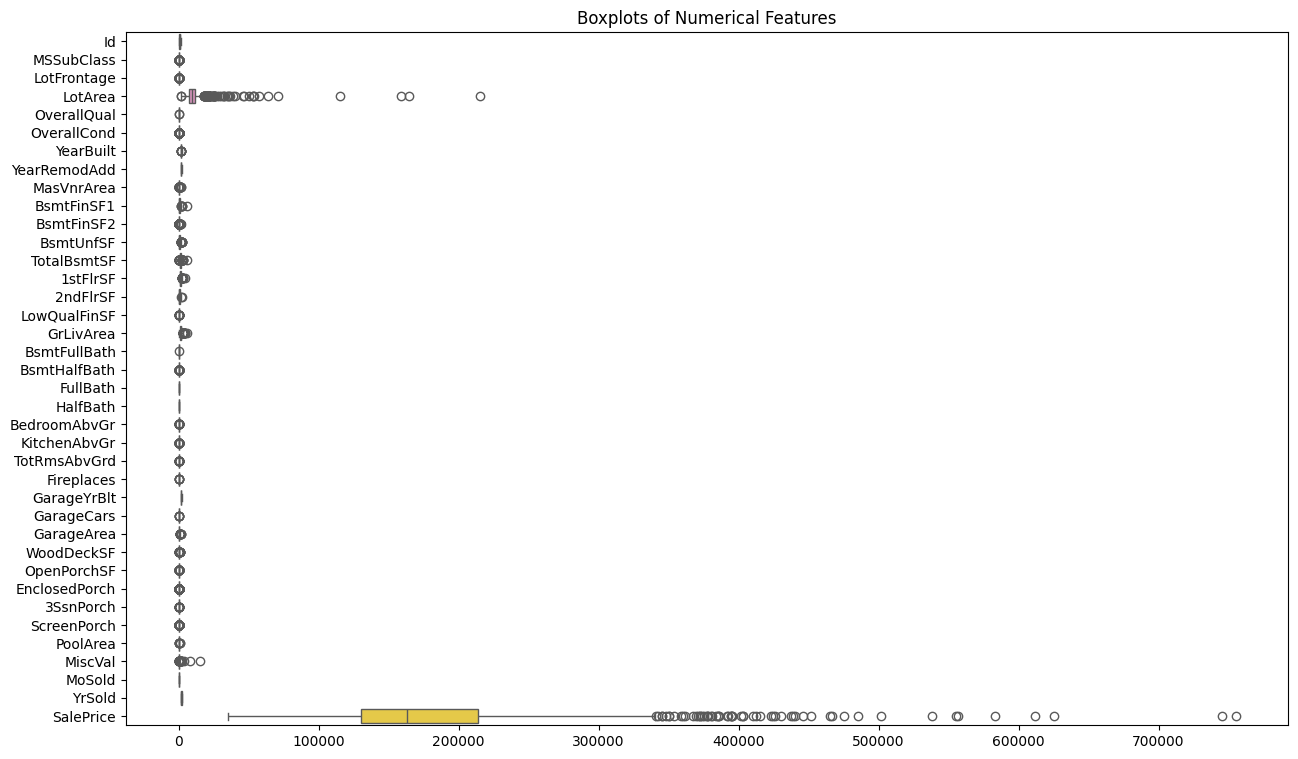

In [12]:
# Detect potential outliers using boxplots
plt.figure(figsize=(15,9))
sns.boxplot(data=df[numerical_cols], orient="h", palette="Set2")
plt.title("Boxplots of Numerical Features")
plt.show()

### Data Manipulation with Pandas

In [13]:
# Filter dataset to include only houses where SalePrice is above the 90th percentile
percentile_90 = df['SalePrice'].quantile(0.90)
high_price_houses = df[df['SalePrice'] > percentile_90]

In [14]:
percentile_90

np.float64(278000.0)

In [15]:
high_price_houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,1404,20,RL,49.0,15256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,282922
1417,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,340000
1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,394617
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000


In [16]:
# Create a new calculated column: Price_Per_SqFt
df['Price_Per_SqFt'] = df['SalePrice'] / df['GrLivArea']

In [17]:
#group by Neighborhood and calculate mean and median SalePrice
neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median']).reset_index()
print("\nMean and Median SalePrice by Neighborhood:")
display(neighborhood_stats)



Mean and Median SalePrice by Neighborhood:


,Neighborhood,mean,median
0,Blmngtn,194870.882353,191000.0
1,Blueste,137500.000000,137500.0
2,BrDale,104493.750000,106000.0
3,BrkSide,124834.051724,124300.0
4,ClearCr,212565.428571,200250.0
5,CollgCr,197965.773333,197200.0
6,Crawfor,210624.725490,200624.0
7,Edwards,128219.700000,121750.0
8,Gilbert,192854.506329,181000.0
9,IDOTRR,100123.783784,103000.0


In [18]:
# Sort dataset by Price_Per_SqFt and display top 10 rows
top_10_price_per_sqft = df.sort_values(by='Price_Per_SqFt', ascending=False).head(10)
print("\nTop 10 houses by Price_Per_SqFt:")
display(top_10_price_per_sqft)


Top 10 houses by Price_Per_SqFt:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Price_Per_SqFt
688,689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,...,NaN,NaN,NaN,0,10,2007,New,Partial,392000,276.250881
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2010,New,Partial,611657,258.738156
1181,1182,120,RM,64.0,5587,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,11,2008,New,Partial,392500,237.590799
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2009,WD,Normal,555000,231.057452
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,New,Partial,501837,224.636079
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,New,Partial,465000,223.988439
473,474,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2007,New,Partial,440000,222.672065
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,New,Partial,372402,217.778947
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,10,2009,WD,Normal,377500,216.208477
1228,1229,120,RL,65.0,8769,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2008,New,Partial,367294,215.801410


### Handling Missing Data and Imputation


In [20]:
# For numerical columns, replace missing values with the median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
      df[col].fillna(df[col].median(), inplace=True)

In [24]:
# For categorical columns, replace missing values with the most frequent value (mode)
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
      df[col].fillna(df[col].mode()[0], inplace=True)


In [25]:
# Check if any missing data remains
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values after imputation: {total_missing}")

if total_missing == 0:
    print("All missing values have been successfully handled.")
else:
    print("Some missing values remain, further investigation needed.")



Total missing values after imputation: 0
All missing values have been successfully handled.
